In [86]:
import pandas as pd
import plotly.express as px
import kaleido
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pickle
import time


## Importing

In [87]:
def plot_timeseries(policy):
    fig = px.line(df[["date", f"{policy}"]], 
                x="date", 
                y=f"{policy}", 
                title=f'Popularity of \'{policy}\' in Google Search Singapore',
                labels={"date":"Date", f"{policy}":"Search popularity"})
    fig.show()
    fig.write_image(f"timeseries/{policy}_timeseries.png", scale=2)

def plot_related_topics(policy):
    # Build Payload
    pytrends.build_payload([policy], geo='SG', timeframe='2020-01-01 2021-03-22', cat=0)
    related_topics = pytrends.related_topics()

    # Plot rising topics
    fig = px.bar(related_topics[f'{policy}']['rising'],
                title=f"Rising topics related to '{policy}' in Singapore ",
                x='topic_title',y='value',
                labels=dict(topic_title="Topic Title", value="Value"))
    fig.update_layout(yaxis_type="log")
    fig.show()
    fig.write_image(f"rising_topics/{policy}_rising_topics.png", scale=2)

    # Plot top topics
    fig = px.bar(related_topics[f'{policy}']['top'],
                title=f"Top topics related to '{policy}' in Singapore ",
                x='topic_title',y='value',
                labels=dict(topic_title="Topic Title", value="Value"))
    fig.update_layout(yaxis_type="log")
    fig.show()
    fig.write_image(f"top_topics/{policy}_top_topics.png", scale=2)


## Defining search terms & building payload

In [98]:
#policy_list = ["covid-19", "vaccination", "tracetogether", "safeentry", "stay home notice"]
policy_list = ["foreign workers", "social distancing", "circuit breaker", "budget", "mask"]
pytrends = TrendReq(hl='en-US', tz=-480)     
pytrends.build_payload(policy_list, geo='SG', timeframe='2020-01-01 2021-03-22', cat=0)

## Calling pytrends: Interest over time

In [99]:
# Run once
df = pytrends.interest_over_time()

In [100]:
df.to_csv('data/interest_over_time.csv')
df = pd.read_csv('data/interest_over_time.csv')
df.tail()

,date,foreign workers,social distancing,circuit breaker,budget,mask,isPartial
58,2021-02-14,0,1,0,18,9,False
59,2021-02-21,0,0,0,4,14,False
60,2021-02-28,0,0,0,4,20,False
61,2021-03-07,0,0,1,3,15,False
62,2021-03-14,0,0,1,4,13,True


## Plotting Timeseries

In [101]:
for policy in policy_list:
    plot_timeseries(policy)


## Calling Pytrends: Related topics

In [103]:
# # save if needed
# pickle.dump(related_topics, open("data/related_topics.p", "wb"))
# related_topics = pickle.load(open("related_topics.p", "rb"))

In [102]:
for policy in policy_list:
    plot_related_topics(policy)
    time.sleep(3)

## Plotting Rising Topics bar graph

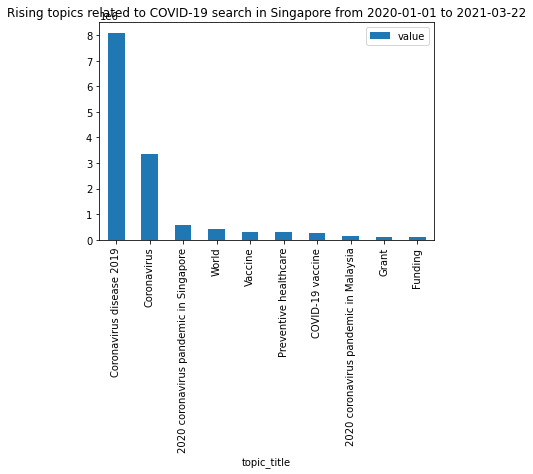

In [26]:
# using matplotlib

related_topics['covid-19']['rising'].plot.bar(x="topic_title", y="value", log=False, title="Rising topics related to COVID-19 search in Singapore from 2020-01-01 to 2021-03-22")

plt.show(block=True)

## Plotting Top Topics bar graph

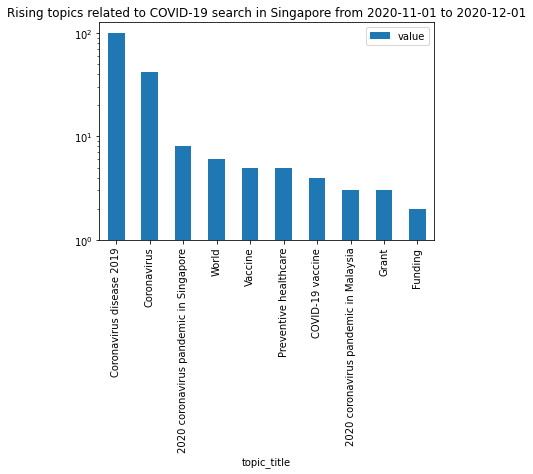

In [82]:
related_topics['covid-19']['top'].plot.bar(x="topic_title", y="value", log=True, title="Rising topics related to COVID-19 search in Singapore from 2020-11-01 to 2020-12-01")

plt.show(block=True)

In [81]:
policy = "covid-19"

pytrends.build_payload([policy], geo='SG', timeframe='2020-01-01 2021-03-22', cat=0)
related_topics = pytrends.related_topics()

fig = px.bar(related_topics[f'{policy}']['top'],
                title=f"Top topics related to '{policy}' in Singapore ",
                x='topic_title',y='value',
                labels=dict(topic_title="Topic Title", value="Value"))
fig.update_layout(yaxis_type="log")
fig.show()
fig.write_image(f"top_topics/{policy}_top_topics.png", scale=2)